In [61]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [13]:
traincsv = 'https://raw.githubusercontent.com/changyeon99/ENDGAME/main/CNC%20%EB%B9%84%EC%8B%9D%EB%B3%84%ED%99%94%20%EC%9B%90%EB%B3%B8%EB%8D%B0%EC%9D%B4%ED%84%B0_1209/train.csv'
train_sample = pd.read_csv(traincsv, header=0, encoding='utf-8')

print(train_sample)

    No  material  feedrate  clamp_pressure tool_condition machining_finalized  \
0    1  aluminum         6             4.0         unworn                 yes   
1    2  aluminum        20             4.0         unworn                 yes   
2    3  aluminum         6             3.0         unworn                 yes   
3    4  aluminum         6             2.5         unworn                  no   
4    5  aluminum        20             3.0         unworn                  no   
5    6  aluminum         6             4.0           worn                 yes   
6    7  aluminum        20             4.0           worn                  no   
7    8  aluminum        20             4.0           worn                 yes   
8    9  aluminum        15             4.0           worn                 yes   
9   10  aluminum        12             4.0           worn                 yes   
10  11  aluminum         3             4.0         unworn                 yes   
11  12  aluminum         3  

In [29]:
ok = train_sample.fillna(2)
ok = ok.replace('yes',0)
ok = ok.replace('no',1)
ok

,No,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,1,aluminum,6,4.0,unworn,0,0
1,2,aluminum,20,4.0,unworn,0,0
2,3,aluminum,6,3.0,unworn,0,0
3,4,aluminum,6,2.5,unworn,1,2
4,5,aluminum,20,3.0,unworn,1,2
5,6,aluminum,6,4.0,worn,0,1
6,7,aluminum,20,4.0,worn,1,2
7,8,aluminum,20,4.0,worn,0,1
8,9,aluminum,15,4.0,worn,0,1
9,10,aluminum,12,4.0,worn,0,1


In [30]:
for row in range(len(ok)):
    if ok.loc[row, 'machining_finalized'] == 1:
        ok.loc[row, 'error'] = 1
    elif ok.loc[row, 'passed_visual_inspection'] == 1:
        ok.loc[row, 'error'] = 1
    else:
        ok.loc[(row, 'error')] = 0

ok = ok[['feedrate','clamp_pressure','tool_condition','error']]
ok['error'] = ok['error'].astype('int')
        
ok

C:\Users\99kit\AppData\Local\Temp\ipykernel_14064\1919426486.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ok['error'] = ok['error'].astype('int')


,feedrate,clamp_pressure,tool_condition,error
0,6,4.0,unworn,0
1,20,4.0,unworn,0
2,6,3.0,unworn,0
3,6,2.5,unworn,1
4,20,3.0,unworn,1
5,6,4.0,worn,1
6,20,4.0,worn,1
7,20,4.0,worn,1
8,15,4.0,worn,1
9,12,4.0,worn,1


In [33]:
#####
ok.loc[0]

feedrate               6
clamp_pressure       4.0
tool_condition    unworn
error                  0
Name: 0, dtype: object

In [34]:
expdataurl = f'https://raw.githubusercontent.com/changyeon99/ENDGAME/main/CNC%20%EB%B9%84%EC%8B%9D%EB%B3%84%ED%99%94%20%EC%9B%90%EB%B3%B8%EB%8D%B0%EC%9D%B4%ED%84%B0_1209/CNC%20Virtual%20Data%20set%20_v2/experiment_01.csv'
df = pd.read_csv(expdataurl, index_col=None, header=0)

In [35]:
df

,X_ActualPosition,X_ActualVelocity,X_ActualAcceleration,X_SetPosition,X_SetVelocity,X_SetAcceleration,X_CurrentFeedback,X_DCBusVoltage,X_OutputCurrent,X_OutputVoltage,...,S_CurrentFeedback,S_DCBusVoltage,S_OutputCurrent,S_OutputVoltage,S_OutputPower,S_SystemInertia,M_CURRENT_PROGRAM_NUMBER,M_sequence_number,M_CURRENT_FEEDRATE,Machining_Process
0,202,4.000,4.00,202,4.0,4.000000,0.18,0.0207,329,2.77,...,0.5240,2.740000e-19,329,0.0,6.960000e-07,16,1,0,50,Starting
1,202,-6.800,-346.00,202,-9.6,-354.000000,-10.90,0.1860,328,23.30,...,-0.2880,2.740000e-19,328,0.0,-5.270000e-07,16,1,4,50,Prep
2,200,-13.800,-2.25,200,-13.9,3.999905,-8.59,0.1400,328,30.60,...,0.5240,2.740000e-19,328,0.0,9.100000e-07,16,1,7,50,Prep
3,198,-14.000,4.00,198,-13.9,3.999905,-6.11,0.1300,327,30.30,...,-0.1800,2.740000e-19,328,0.0,1.070000e-06,16,1,7,50,Prep
4,197,-13.900,-14.80,196,-13.9,4.000095,-5.70,0.1140,328,30.50,...,0.2260,2.740000e-19,328,0.0,1.960000e-06,16,1,7,50,Prep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,145,4.175,91.50,145,4.0,4.000000,-2.84,0.0522,325,7.39,...,20.5000,9.310000e-01,319,118.0,1.790000e-01,16,1,132,50,end
1051,145,3.850,-83.50,145,4.0,4.000000,-1.85,0.0522,325,2.69,...,15.8000,7.200000e-01,319,117.0,1.380000e-01,16,1,132,50,end
1052,145,3.825,-83.50,145,4.0,4.000000,-2.20,0.0527,325,2.22,...,24.3000,1.000000e+00,318,120.0,1.920000e-01,16,1,132,50,end
1053,145,4.150,91.50,145,4.0,4.000000,-4.02,0.0502,326,5.80,...,22.4000,9.290000e-01,321,120.0,1.780000e-01,16,1,132,50,end


In [16]:
# ok.to_csv("C:/Users/99kit/Desktop/[생시구]자원최적화/label.csv", index=False)

In [48]:
accumulated_df = pd.DataFrame()

for i in range(1, 26):
    i = "{:02d}".format(i)
    expdataurl = f'https://raw.githubusercontent.com/changyeon99/ENDGAME/main/CNC%20%EB%B9%84%EC%8B%9D%EB%B3%84%ED%99%94%20%EC%9B%90%EB%B3%B8%EB%8D%B0%EC%9D%B4%ED%84%B0_1209/CNC%20Virtual%20Data%20set%20_v2/experiment_{i}.csv'
    df = pd.read_csv(expdataurl, index_col=None, header=0)

    df = df.drop(['Machining_Process'],axis=1)
    df = df.drop(['M_sequence_number'],axis=1)
    df = df.drop(['M_CURRENT_PROGRAM_NUMBER'],axis=1)
    
    df['error']=ok.loc[int(i)-1,'error']
    
    accumulated_df = accumulated_df.append(df, ignore_index=True)

C:\Users\99kit\AppData\Local\Temp\ipykernel_14064\306095144.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accumulated_df = accumulated_df.append(df, ignore_index=True)
C:\Users\99kit\AppData\Local\Temp\ipykernel_14064\306095144.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accumulated_df = accumulated_df.append(df, ignore_index=True)
C:\Users\99kit\AppData\Local\Temp\ipykernel_14064\306095144.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accumulated_df = accumulated_df.append(df, ignore_index=True)
C:\Users\99kit\AppData\Local\Temp\ipykernel_14064\306095144.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accumu

In [49]:
accumulated_df.shape

(32048, 46)

In [41]:
# accumulated_df.to_csv("C:/Users/99kit/Desktop/[생시구]자원최적화/data.csv", index=False)

In [52]:
# 훈련, 검증, 테스트 데이터로 분리

train_valid_df, test_df = train_test_split(accumulated_df, test_size=0.2, random_state=42)

train_df, valid_df = train_test_split(train_valid_df, test_size=0.2, random_state=42)

In [53]:
train_df

,X_ActualPosition,X_ActualVelocity,X_ActualAcceleration,X_SetPosition,X_SetVelocity,X_SetAcceleration,X_CurrentFeedback,X_DCBusVoltage,X_OutputCurrent,X_OutputVoltage,...,S_SetVelocity,S_SetAcceleration,S_CurrentFeedback,S_DCBusVoltage,S_OutputCurrent,S_OutputVoltage,S_OutputPower,S_SystemInertia,M_CURRENT_FEEDRATE,error
6019,167.0,8.9000,5.000,167.0,8.79,-5.60,3.89,0.0915,324,12.000,...,58.30,5.000000,27.800,9.650000e-01,319,119.0,1.810000e-01,17.0,6,1
413,150.0,9.2200,10.250,150.0,9.32,8.22,7.49,0.1100,326,12.100,...,57.30,4.000000,24.800,1.050000e+00,320,117.0,2.030000e-01,16.0,6,0
16222,203.0,5.0000,-1.250,203.0,5.00,5.00,1.94,0.0313,330,3.630,...,5.00,5.000000,0.842,2.770000e-19,330,0.0,-3.450000e-06,17.0,50,0
22867,166.0,1.9700,48.800,166.0,2.00,5.00,-5.63,0.0931,327,9.190,...,58.30,5.000001,17.800,9.420000e-01,320,123.0,1.820000e-01,17.0,3,0
5188,201.0,3.0250,21.800,201.0,3.00,3.00,-1.26,0.0218,327,0.502,...,3.00,3.000000,-0.816,2.770000e-19,327,0.0,2.220000e-06,15.0,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13074,167.0,4.8500,-76.200,167.0,5.00,5.00,1.66,0.0507,327,8.660,...,58.30,5.000000,31.100,1.060000e+00,322,119.0,2.000000e-01,17.0,3,0
18078,147.0,2.6500,23.800,147.0,2.76,7.28,-4.10,0.0742,327,9.060,...,58.30,5.000000,24.500,9.220000e-01,323,120.0,1.770000e-01,17.0,3,0
8483,146.0,5.0000,-1.250,146.0,5.00,5.00,-2.54,0.0527,327,2.000,...,5.00,5.000000,0.105,2.790000e-19,327,0.0,-6.840000e-07,17.0,50,1
31629,150.0,6.5100,30.025,150.0,6.50,5.00,-1.62,0.0308,328,2.460,...,31.65,5.000000,0.726,2.710000e-19,327,0.0,3.170000e-04,17.0,50,0


In [54]:
train_df['error']

6019     1
413      0
16222    0
22867    0
5188     1
        ..
13074    0
18078    0
8483     1
31629    0
28535    0
Name: error, Length: 20510, dtype: int32

In [62]:
# PCA

trdf = train_df.drop(['error'], axis = 1) # 종속변수는 train_df['error']
vadf = valid_df.drop(['error'], axis = 1)
tsdf = test_df.drop(['error'], axis = 1)

feature_cols = trdf.columns # 이거 왜 썼지

scaler = StandardScaler()
standardized_trdata = scaler.fit_transform(trdf)
standardized_vadata = scaler.transform(vadf)
standardized_tsdata = scaler.transform(tsdf)

pca = PCA(n_components=15)

pca.fit(standardized_trdata)

transformed_data = pca.transform(standardized_trdata) # pca_train
pca_valid = pca.transform(standardized_vadata)
pca_test = pca.transform(standardized_tsdata)

explained_variance_ratio = pca.explained_variance_ratio_

pca_results = pd.DataFrame({'Principal Component': range(1, len(explained_variance_ratio) + 1),
                            'Explained Variance Ratio': explained_variance_ratio})

print(pca_results)

explanatory_power_threshold = 0.9  # 변경 가능
total_explained_variance_ratio = np.cumsum(explained_variance_ratio)
k = np.argmax(total_explained_variance_ratio >= explanatory_power_threshold) + 1

print(f"Number of principal components to achieve {explanatory_power_threshold * 100}% explanatory power: {k}")

    Principal Component  Explained Variance Ratio
0                     1                  0.311676
1                     2                  0.113911
2                     3                  0.072202
3                     4                  0.049813
4                     5                  0.047839
5                     6                  0.046118
6                     7                  0.044737
7                     8                  0.036796
8                     9                  0.033573
9                    10                  0.031799
10                   11                  0.031260
11                   12                  0.029101
12                   13                  0.024539
13                   14                  0.021373
14                   15                  0.016697
Number of principal components to achieve 90.0% explanatory power: 15


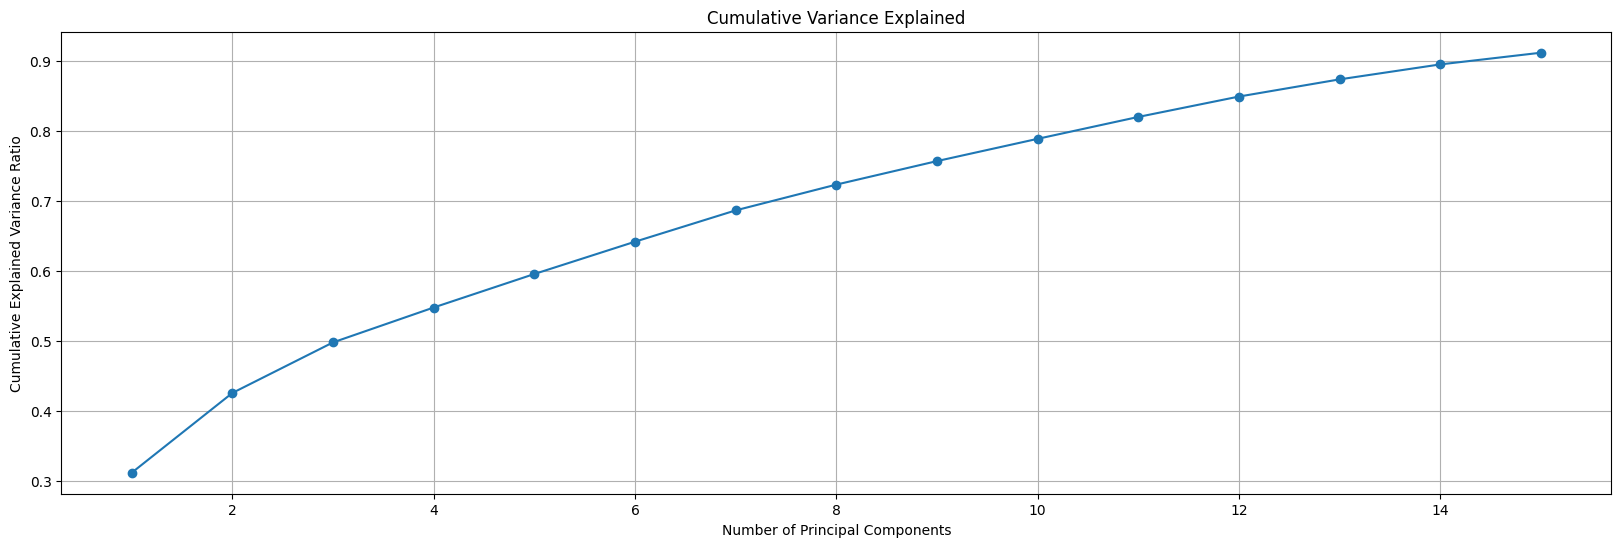

In [63]:
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(20, 6))
plt.plot(range(1, len(cumulative_explained_variance_ratio) + 1), cumulative_explained_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Variance Explained')
plt.grid(True)
plt.show()

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
logistic_regression = LogisticRegression()

In [70]:
logistic_regression.fit(transformed_data, train_df['error'])

LogisticRegression()

In [71]:
pred = logistic_regression.predict(pca_valid)

In [72]:
true_labels = valid_df['error']
predicted_labels = pred

# accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# precision
precision = precision_score(true_labels, predicted_labels)

# recall
recall = recall_score(true_labels, predicted_labels)

# F1 score
f1 = f1_score(true_labels, predicted_labels)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8553042121684867
Precision: 0.7855361596009975
Recall: 0.6613016095171449
F1 Score: 0.7180851063829787


In [73]:
from sklearn.metrics import classification_report

In [75]:
print(classification_report(true_labels, pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      3699
           1       0.79      0.66      0.72      1429

    accuracy                           0.86      5128
   macro avg       0.83      0.80      0.81      5128
weighted avg       0.85      0.86      0.85      5128

